# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#pip install citipy

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import openweathermapy as ow
from pprint import pprint 

# Import API key
from api_keys import api_key

# Incorporate| citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
cities_df=pd.DataFrame(cities)
cities_df.columns=["City"]
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat']=""
cities_df['Lng']=""
cities_df['Max Temp']=""
cities_df['Wind Speed']=""
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,taoudenni,,,,,,,,
1,amderma,,,,,,,,
2,vaitupu,,,,,,,,
3,bargal,,,,,,,,
4,belushya guba,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
settings = {"units": "imperial", "appid": api_key}

for index, row in cities_df.iterrows():
    
    try: 
        weather_data = ow.get_current(row['City'], **settings)
        
        print(f"Processing Record {(index+1)%50} of Set {(index+1)//50+1} | {cities[index]}")
        
        cities_df.loc[index,'Cloudiness'] = weather_data['clouds']['all']
        cities_df.loc[index, 'Country'] = weather_data['sys']['country']
        cities_df.loc[index, 'Date'] = weather_data['dt']
        cities_df.loc[index, 'Humidity'] = weather_data['main']['humidity']
        cities_df.loc[index, 'Lat'] = weather_data['coord']['lat']
        cities_df.loc[index, 'Lng'] = weather_data['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = weather_data['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = weather_data['wind']['speed']
        
    except:
        print("City not found. Skipping...")

Processing Record 1 of Set 1 | taoudenni
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | lutry
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | smithers
Processing Record 11 of Set 1 | honiara
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | egvekinot
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | kandi
Processing Record 16 of Set 1 | djougou
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | naryan-mar
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | roscommon
Processing Record 22 of Set 1 | whitehorse
Processing Record 23 of Set 1 | busselton
Processing Record 24 of Set 1 | cherskiy
Processing Record 25 of Set 1 | ayan
Processing Record 26 of Set 1 | 

City not found. Skipping...
Processing Record 8 of Set 5 | port blair
Processing Record 9 of Set 5 | kawambwa
Processing Record 10 of Set 5 | port hardy
Processing Record 11 of Set 5 | tayoltita
City not found. Skipping...
Processing Record 13 of Set 5 | flin flon
Processing Record 14 of Set 5 | asyut
Processing Record 15 of Set 5 | dhidhdhoo
Processing Record 16 of Set 5 | umm lajj
Processing Record 17 of Set 5 | suluq
Processing Record 18 of Set 5 | salina
Processing Record 19 of Set 5 | mingaora
Processing Record 20 of Set 5 | amahai
City not found. Skipping...
Processing Record 22 of Set 5 | pangnirtung
Processing Record 23 of Set 5 | cabo san lucas
Processing Record 24 of Set 5 | ladario
Processing Record 25 of Set 5 | east london
Processing Record 26 of Set 5 | castro
Processing Record 27 of Set 5 | canico
Processing Record 28 of Set 5 | sola
Processing Record 29 of Set 5 | belyy yar
City not found. Skipping...
Processing Record 31 of Set 5 | kodiak
Processing Record 32 of Set 5 

City not found. Skipping...
Processing Record 16 of Set 9 | pangody
Processing Record 17 of Set 9 | srandakan
Processing Record 18 of Set 9 | farmington
Processing Record 19 of Set 9 | komsomolskiy
City not found. Skipping...
Processing Record 21 of Set 9 | salym
Processing Record 22 of Set 9 | mareeba
Processing Record 23 of Set 9 | vila franca do campo
Processing Record 24 of Set 9 | souillac
Processing Record 25 of Set 9 | cidreira
Processing Record 26 of Set 9 | hasaki
Processing Record 27 of Set 9 | santiago
Processing Record 28 of Set 9 | inhambane
Processing Record 29 of Set 9 | longyearbyen
Processing Record 30 of Set 9 | maningrida
Processing Record 31 of Set 9 | luderitz
Processing Record 32 of Set 9 | moose factory
Processing Record 33 of Set 9 | flinders
Processing Record 34 of Set 9 | fereydun kenar
Processing Record 35 of Set 9 | tarakan
City not found. Skipping...
City not found. Skipping...
Processing Record 38 of Set 9 | purranque
Processing Record 39 of Set 9 | takora

In [9]:
cities_df.head(35)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,taoudenni,12,ML,1562741540,21,22.68,-3.98,91.13,6.31
1,amderma,,,,,,,,
2,vaitupu,,,,,,,,
3,bargal,,,,,,,,
4,belushya guba,,,,,,,,
5,ushuaia,0,AR,1562741351,100,-54.81,-68.31,33.8,3.83
6,lutry,0,CH,1562741585,62,46.5,6.69,62.6,9.17
7,new norfolk,75,AU,1562741422,47,-42.78,147.06,57.2,19.46
8,tuktoyaktuk,83,CA,1562741463,59,69.44,-133.03,51.71,11.59
9,smithers,40,CA,1562741586,82,54.78,-127.17,60.8,3.36


In [27]:
cities_df.to_csv("citiesweather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperatue (07/08/19)')

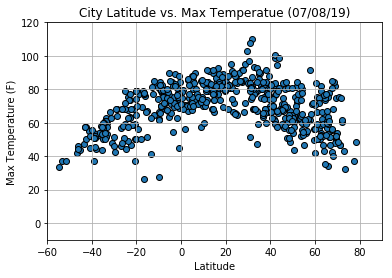

In [19]:
Latplot=pd.to_numeric(cities_df.Lat)
Templot=pd.to_numeric(cities_df['Max Temp'])
plt.scatter(Latplot,Templot,edgecolor='k')
plt.xlim([-60, 90])
plt.ylim([-10, 120])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperatue (07/08/19)")

In [20]:
plt.savefig("Max_Temp_Lat.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity (07/08/19)')

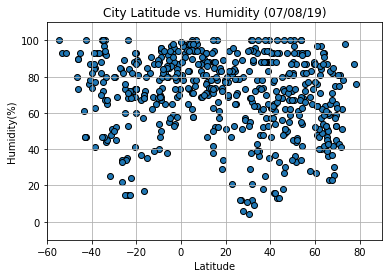

In [21]:
Latplot=pd.to_numeric(cities_df.Lat)
Humplot=pd.to_numeric(cities_df['Humidity'])
plt.scatter(Latplot,Humplot,edgecolor='k')
plt.grid()
plt.xlim([-60, 90])
plt.ylim([-10, 110])
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (07/08/19)")

In [22]:
plt.savefig("Humidity_Lat.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness (07/08/19)')

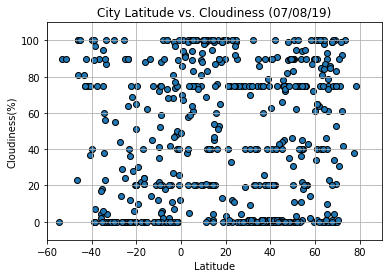

In [23]:
Latplot=pd.to_numeric(cities_df.Lat)
Cloplot=pd.to_numeric(cities_df['Cloudiness'])
plt.scatter(Latplot,Cloplot,edgecolor='k')
plt.grid()
plt.xlim([-60, 90])
plt.ylim([-10, 110])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness (07/08/19)")

In [24]:
plt.savefig("Cloudiness_Lat.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed (07/08/19)')

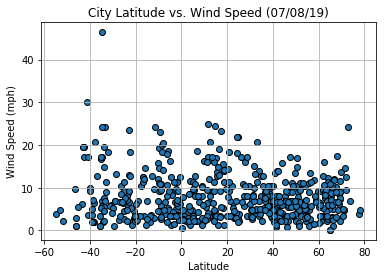

In [25]:
Latplot=pd.to_numeric(cities_df.Lat)
Winplot=pd.to_numeric(cities_df['Wind Speed'])
plt.scatter(Latplot,Winplot,edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (07/08/19)")

In [26]:
plt.savefig("Wind_Speed_Lat.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
#Trends
#1-Max temp gets higher as we get closer to the equator
#2-Latitude does not affect cloudiness
#3-Latitude does not affect wind speed
#4-Latitude slightly affects humidity; higher levels closer to equator 